Straight track lattice

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mineut
from mineut import plot_tools as pt
from mineut import lattice_tools as lt

In [2]:
from mineut.MuC import MuDecaySimulator

design = {
    "name": r"$\nu$STORM",
    "short_name": "nustorm",
    "muon_polarization": 0.0,
    }

nufact_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e5,
    )

nufact_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e5,
    )

nufact_numu.decay_muons()
nufact_nue.decay_muons()

In [3]:
straight_lattice = lt.create_straight_lattice(
            total_length=100e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=0.1,
            beamsize=1,
        )

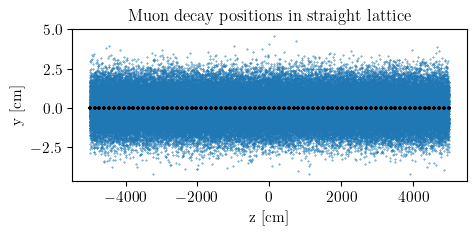

In [4]:
nufact_nue.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
ax.scatter(straight_lattice.vertices[0], straight_lattice.vertices[1], c='black', marker='+', s=10)
#fig.gca().set_aspect('equal', adjustable='box')
ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Muon decay positions in straight lattice")
fig.savefig('plots/straight_track_decay_positions.pdf', bbox_inches='tight')

Dogbone lattice Idea

Wolfram MathWorld describes a "teardrop curve" that can potentially serve our needs (https://mathworld.wolfram.com/TeardropCurve.html). In this mathematica folder, there is an integral that can be performed to find the arc length of a given teardrop. Theoretically, if I have a shape that I want determined by $m$, I can numerically solve for how much to scale the teardrop by to get the desired length of the track. Then I can append to each end of the straight track and we get a dogbone track. I can do this in Mathematica using FindRoot but not sure how it would look in Python. Maybe C++ if it's computationally heavy?

In [5]:
dogbone_lattice = lt.create_dogbone_lattice(
            straight_length=100e2,
            total_length=300e2,
            m=2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=0.1,
            beamsize=1,
        )

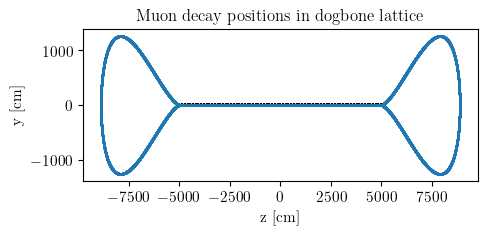

In [6]:
nufact_nue.place_muons_on_lattice(lattice=dogbone_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=dogbone_lattice, direction="clockwise")

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(straight_lattice.vertices[0], straight_lattice.vertices[1], c='black', marker='+', s=10)
ax.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
#fig.gca().set_aspect('equal', adjustable='box')
ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Muon decay positions in dogbone lattice")
fig.savefig('plots/dogbone_track_decay_positions.pdf', bbox_inches='tight')